# Quick Plots from Pandas

Prepared by [me](https://www.linkedin.com/in/yasharmansouri)

Feel free to copy the code.

The notebook is heavily influenced by the IBM Data Visualization course.

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
mpl.style.use(['fivethirtyeight'])


### Version Check

In [2]:
print('Pandas', pd.__version__,
      '\nNumpy', np.__version__,
      '\nMatplotlib', mpl.__version__)

Pandas 0.25.1 
Numpy 1.16.5 
Matplotlib 3.1.1


### Matplotlib List of Available Styles

In [3]:
mpl.style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10',
 '_classic_test']

### Matplotlib List of Named Colors

[Matplotlib Colors](https://matplotlib.org/3.1.0/gallery/color/named_colors.html)

In [4]:
for name, hex in mcolors.cnames.items():
    print(name, hex)

aliceblue #F0F8FF
antiquewhite #FAEBD7
aqua #00FFFF
aquamarine #7FFFD4
azure #F0FFFF
beige #F5F5DC
bisque #FFE4C4
black #000000
blanchedalmond #FFEBCD
blue #0000FF
blueviolet #8A2BE2
brown #A52A2A
burlywood #DEB887
cadetblue #5F9EA0
chartreuse #7FFF00
chocolate #D2691E
coral #FF7F50
cornflowerblue #6495ED
cornsilk #FFF8DC
crimson #DC143C
cyan #00FFFF
darkblue #00008B
darkcyan #008B8B
darkgoldenrod #B8860B
darkgray #A9A9A9
darkgreen #006400
darkgrey #A9A9A9
darkkhaki #BDB76B
darkmagenta #8B008B
darkolivegreen #556B2F
darkorange #FF8C00
darkorchid #9932CC
darkred #8B0000
darksalmon #E9967A
darkseagreen #8FBC8F
darkslateblue #483D8B
darkslategray #2F4F4F
darkslategrey #2F4F4F
darkturquoise #00CED1
darkviolet #9400D3
deeppink #FF1493
deepskyblue #00BFFF
dimgray #696969
dimgrey #696969
dodgerblue #1E90FF
firebrick #B22222
floralwhite #FFFAF0
forestgreen #228B22
fuchsia #FF00FF
gainsboro #DCDCDC
ghostwhite #F8F8FF
gold #FFD700
goldenrod #DAA520
gray #808080
green #008000
greenyellow #ADFF2F


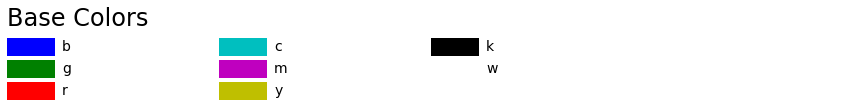

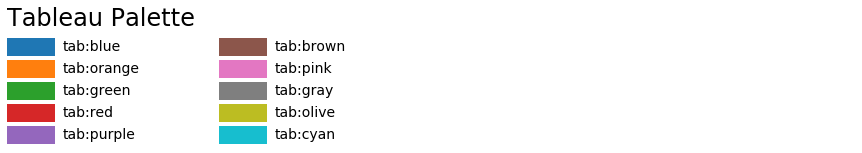

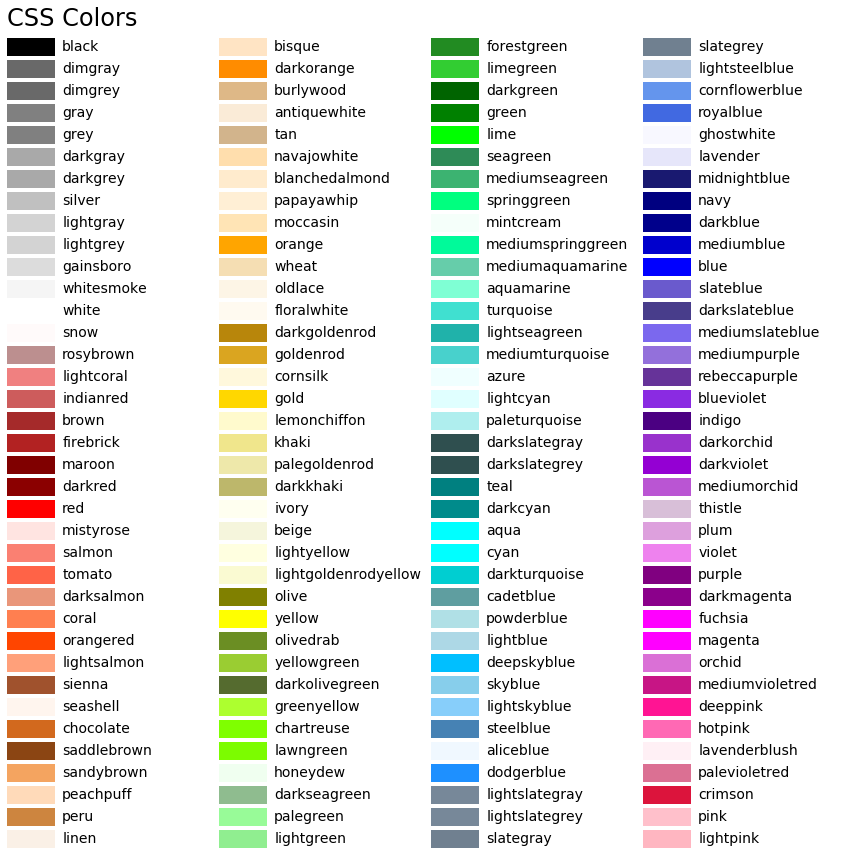

In [5]:
#code by matplotlib.org

def plot_colortable(colors, title, sort_colors=True, emptycols=0):

    cell_width = 212
    cell_height = 22
    swatch_width = 48
    margin = 12
    topmargin = 40

    # Sort colors by hue, saturation, value and name.
    if sort_colors is True:
        by_hsv = sorted((tuple(mcolors.rgb_to_hsv(mcolors.to_rgb(color))),
                         name)
                        for name, color in colors.items())
        names = [name for hsv, name in by_hsv]
    else:
        names = list(colors)

    n = len(names)
    ncols = 4 - emptycols
    nrows = n // ncols + int(n % ncols > 0)

    width = cell_width * 4 + 2 * margin
    height = cell_height * nrows + margin + topmargin
    dpi = 72

    fig, ax = plt.subplots(figsize=(width / dpi, height / dpi), dpi=dpi)
    fig.subplots_adjust(margin/width, margin/height,
                        (width-margin)/width, (height-topmargin)/height)
    ax.set_xlim(0, cell_width * 4)
    ax.set_ylim(cell_height * (nrows-0.5), -cell_height/2.)
    ax.yaxis.set_visible(False)
    ax.xaxis.set_visible(False)
    ax.set_axis_off()
    ax.set_title(title, fontsize=24, loc="left", pad=10)

    for i, name in enumerate(names):
        row = i % nrows
        col = i // nrows
        y = row * cell_height

        swatch_start_x = cell_width * col
        swatch_end_x = cell_width * col + swatch_width
        text_pos_x = cell_width * col + swatch_width + 7

        ax.text(text_pos_x, y, name, fontsize=14,
                horizontalalignment='left',
                verticalalignment='center')

        ax.hlines(y, swatch_start_x, swatch_end_x,
                  color=colors[name], linewidth=18)

    return fig

plot_colortable(mcolors.BASE_COLORS, "Base Colors",
                sort_colors=False, emptycols=1)
plot_colortable(mcolors.TABLEAU_COLORS, "Tableau Palette",
                sort_colors=False, emptycols=2)

#sphinx_gallery_thumbnail_number = 3
plot_colortable(mcolors.CSS4_COLORS, "CSS Colors")

# Optionally plot the XKCD colors (Caution: will produce large figure)
#xkcd_fig = plot_colortable(mcolors.XKCD_COLORS, "XKCD Colors")
#xkcd_fig.savefig("XKCD_Colors.png")

plt.show()

# Importing Dataframe, Wrangling

In [6]:
df = pd.read_excel('data/Canada.xlsx',
sheet_name='Canada by Citizenship',
skiprows=range(20),skipfooter=2)

print('beep boop beep!', '\nData ready!༼ つ ◕_◕ ༽つ')

beep boop beep! 
Data ready!༼ つ ◕_◕ ༽つ


In [7]:
df.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [8]:
df.tail()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
190,Immigrants,Foreigners,Viet Nam,935,Asia,920,South-Eastern Asia,902,Developing regions,1191,...,1816,1852,3153,2574,1784,2171,1942,1723,1731,2112
191,Immigrants,Foreigners,Western Sahara,903,Africa,912,Northern Africa,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
192,Immigrants,Foreigners,Yemen,935,Asia,922,Western Asia,902,Developing regions,1,...,124,161,140,122,133,128,211,160,174,217
193,Immigrants,Foreigners,Zambia,903,Africa,910,Eastern Africa,902,Developing regions,11,...,56,91,77,71,64,60,102,69,46,59
194,Immigrants,Foreigners,Zimbabwe,903,Africa,910,Eastern Africa,902,Developing regions,72,...,1450,615,454,663,611,508,494,434,437,407


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 43 columns):
Type        195 non-null object
Coverage    195 non-null object
OdName      195 non-null object
AREA        195 non-null int64
AreaName    195 non-null object
REG         195 non-null int64
RegName     195 non-null object
DEV         195 non-null int64
DevName     195 non-null object
1980        195 non-null int64
1981        195 non-null int64
1982        195 non-null int64
1983        195 non-null int64
1984        195 non-null int64
1985        195 non-null int64
1986        195 non-null int64
1987        195 non-null int64
1988        195 non-null int64
1989        195 non-null int64
1990        195 non-null int64
1991        195 non-null int64
1992        195 non-null int64
1993        195 non-null int64
1994        195 non-null int64
1995        195 non-null int64
1996        195 non-null int64
1997        195 non-null int64
1998        195 non-null int64
1999        195 non-n

## Dropping & Renaming Columns

In [10]:
df.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)

In [11]:
df.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)

In [12]:
df.columns.values

array(['Country', 'Continent', 'Region', 'DevName', 1980, 1981, 1982,
       1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013], dtype=object)

In [13]:
df.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1


In [14]:
#creating a 'Total' column for the sum of all values
df['Total'] = df.sum(axis=1)

In [15]:
df.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15


In [16]:
df.isnull().sum()

Country      0
Continent    0
Region       0
DevName      0
1980         0
1981         0
1982         0
1983         0
1984         0
1985         0
1986         0
1987         0
1988         0
1989         0
1990         0
1991         0
1992         0
1993         0
1994         0
1995         0
1996         0
1997         0
1998         0
1999         0
2000         0
2001         0
2002         0
2003         0
2004         0
2005         0
2006         0
2007         0
2008         0
2009         0
2010         0
2011         0
2012         0
2013         0
Total        0
dtype: int64

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
1980,195.0,508.394872,1949.588546,0.0,0.0,13.0,251.5,22045.0
1981,195.0,566.989744,2152.643752,0.0,0.0,10.0,295.5,24796.0
1982,195.0,534.723077,1866.997511,0.0,0.0,11.0,275.0,20620.0
1983,195.0,387.435897,1204.333597,0.0,0.0,12.0,173.0,10015.0
1984,195.0,376.497436,1198.246371,0.0,0.0,13.0,181.0,10170.0
1985,195.0,358.861538,1079.309600,0.0,0.0,17.0,197.0,9564.0
1986,195.0,441.271795,1225.576630,0.0,0.5,18.0,254.0,9470.0
1987,195.0,691.133333,2109.205607,0.0,0.5,26.0,434.0,21337.0
1988,195.0,714.389744,2443.606788,0.0,1.0,34.0,409.0,27359.0
1989,195.0,843.241026,2555.048874,0.0,1.0,44.0,508.5,23795.0


In [18]:
#checking column values types
[type(col) for col in df.columns.values]

[str,
 str,
 str,
 str,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 int,
 str]

In [19]:
# in case we wanted to make the year values in columns in string format
# df.columns = df.columns.map(str)

In [20]:
df.shape

(195, 39)

In [21]:
years = list(range(1980, 2014))

In [22]:
#setting index to Country
df.set_index('Country', inplace = True)
#removing the name from index
df.index.name=''

# Line PLots

## Plotting Iranian Immigrants- Line Plot

In [23]:
#Iran is not islamic republic thus we change the index name
df.rename(index={'Iran (Islamic Republic of)':'Iran'}, inplace=True)

In [24]:
df.loc[['Iran'], years]

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
,,,,,,,,,,,,,,,,,,,,,
Iran,1172,1429,1822,1592,1977,1648,1794,2989,3273,3781,...,6348,5837,7480,6974,6475,6580,7477,7479,7534,11291


In [49]:
iran = df.loc[['Iran'], years].T

In [50]:
iran

,Iran
1980,1172
1981,1429
1982,1822
1983,1592
1984,1977
1985,1648
1986,1794
1987,2989
1988,3273
1989,3781


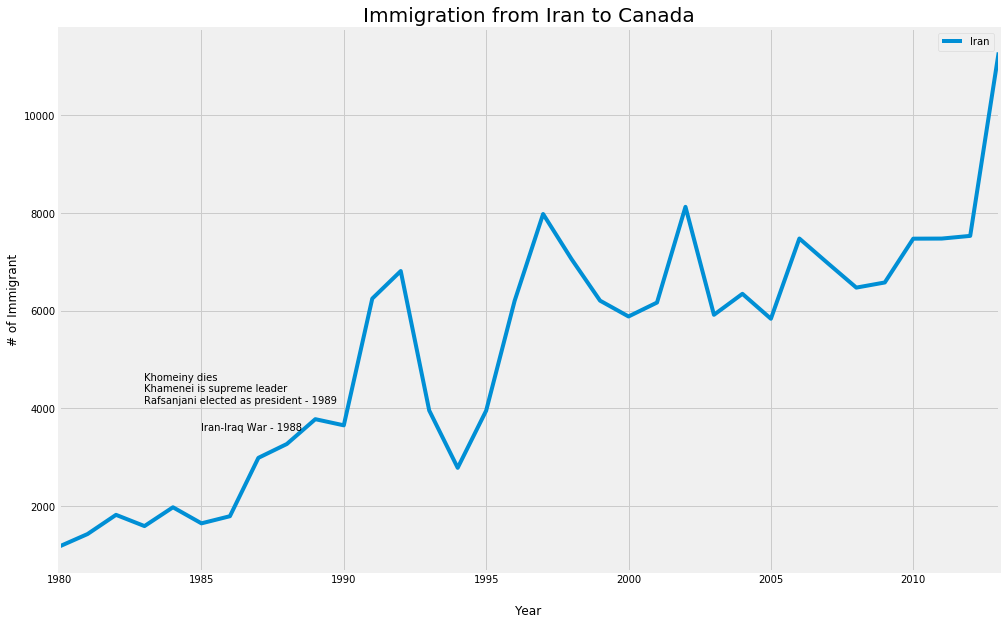

In [51]:
iran.plot(figsize=(15,10))
plt.title('Immigration from Iran to Canada', size=20)
plt.xlabel('Year', labelpad=20)
plt.ylabel('# of Immigrant')
plt.text(1985, 3550, 'Iran-Iraq War - 1988')
plt.text(1983, 4100, 'Khomeiny dies\nKhamenei is supreme leader\nRafsanjani elected as president - 1989')
plt.show()
#Fix annotations with markers

# Bar Charts

## Visualizing the top 5 countries 

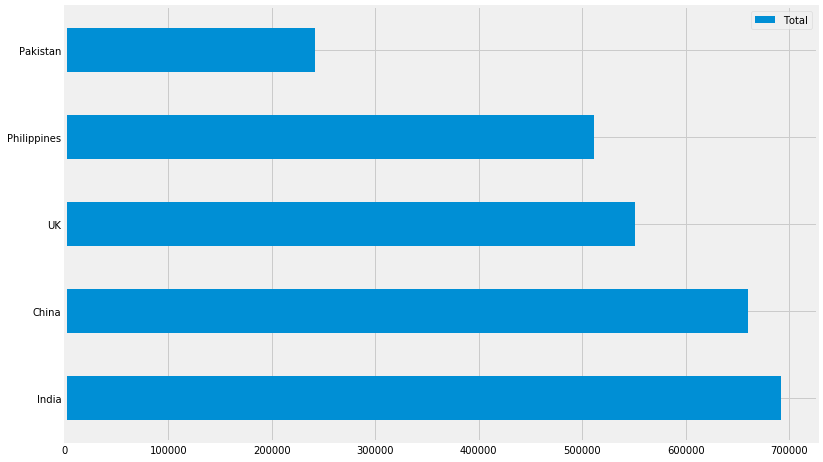

In [52]:
df[['Total']].sort_values('Total', ascending = False).head(5).plot(kind='barh', figsize=(12,8));

In [53]:
# Hey yo UK what's with the name bruh ಠ_ಠ!
df.rename(index={'United Kingdom of Great Britain and Northern Ireland':'UK'}, inplace=True)

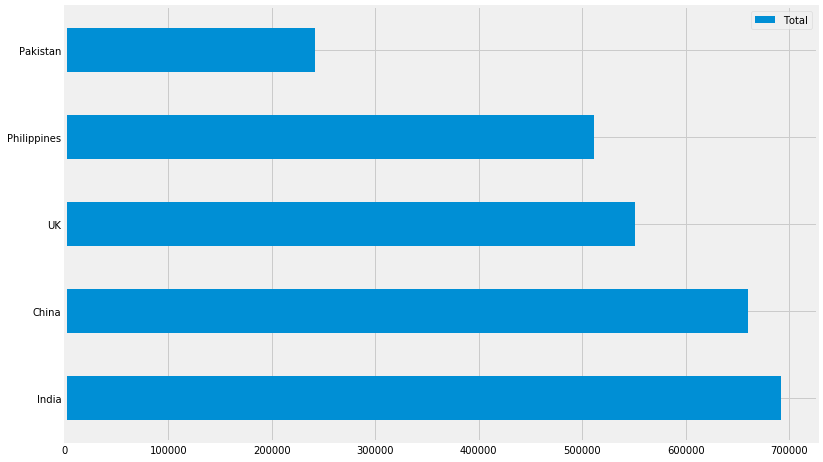

In [54]:
df[['Total']].sort_values('Total', ascending = False).head(5).plot(kind='barh', figsize=(12,8));

# Pie Charts

## Immigration to Canada per Continent -1980-2013

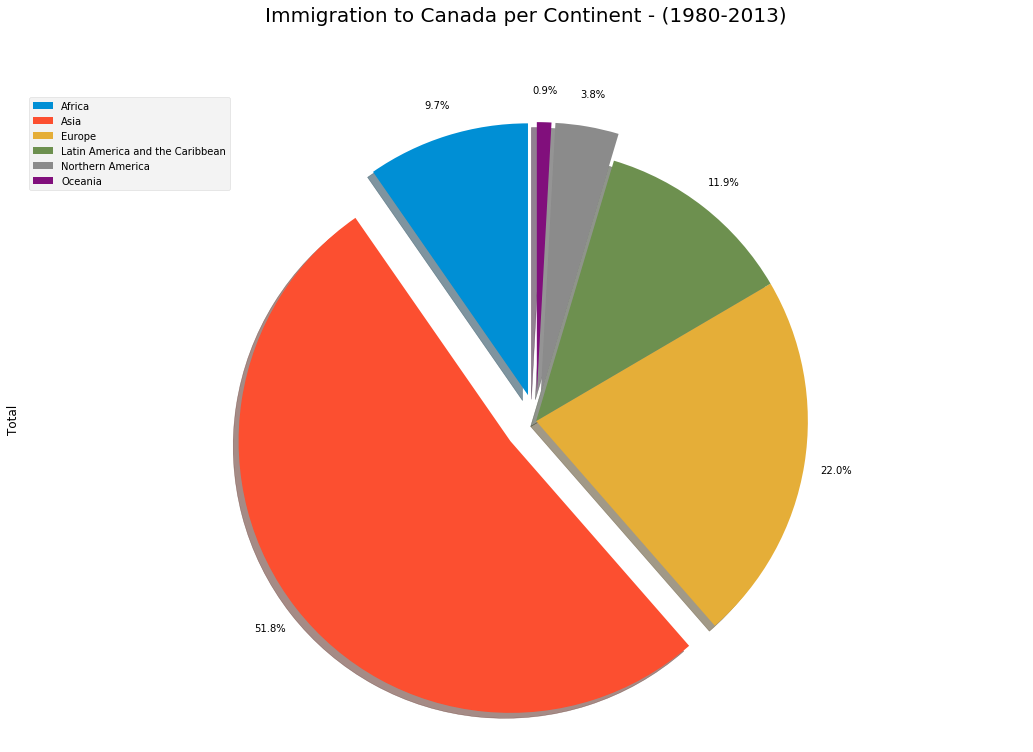

In [55]:
# method 1
explode = [0.1, 0.12, 0, 0, 0.1, 0.1] # offset ratio for each pie if needed to explode!

#axis=0 is default, but better to mention, no confusoo ¯\_(ツ)_/¯!
df.groupby('Continent', axis=0).sum()['Total'].plot(kind='pie',
                                                    labels=None,
                                                    figsize=(16,12),
                                                    autopct='%1.1f%%',
                                                    pctdistance=1.12,
                                                    startangle=90,
                                                    shadow=True,                                                                         explode=explode)
# autopct: auto percent them with the string format
# pctdistance: percent distance from the default
# startangle: start of rotation angle
# explode: making pie charts look bomb! taking out slices

plt.title('Immigration to Canada per Continent - (1980-2013)', size=20,y=1.1)
#y is to move the tilte up and down
#size the is font size
plt.axis('equal')#
plt.legend(loc='upper left', labels=df.groupby('Continent', axis=0).sum().index)
plt.show();
#Asia took half of the pizza!!!

To change the colors we can add a *colors* that has a lequal length list of colors to the number of slices you have

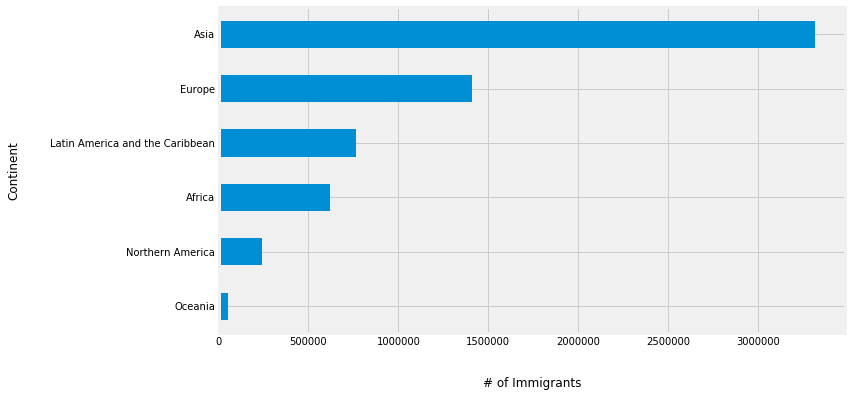

In [56]:
# Why not bar chart? Cause no one cares about bar charts anymore
# ( •_•)>⌐■-■
df.groupby('Continent', axis=0).sum().sort_values('Total')['Total'].plot(kind='barh', figsize=(10,6))
plt.xlabel('# of Immigrants', labelpad=30)
plt.ylabel('Continent', labelpad=30);#label pad arguement puts distance from the ticks or the edges of the plot
#Oh Asia why Asia? ( ´･･)ﾉ(._.`)


# Box plots

### U.S. Ranking on total immigrants to Canada between 1980-2013

In [57]:
#where does US immigrants to canda stand between all the countries?
df[['Total']].sort_values('Total', ascending=False).index.get_loc('United States of America') + 1#since python starts from zero

6

### Top 10 Countries

In [58]:
df[['Total']].sort_values('Total', ascending=False).head(10)

,Total
,
India,691904
China,659962
UK,551500
Philippines,511391
Pakistan,241600
United States of America,241122
Iran,175923
Sri Lanka,148358
Republic of Korea,142581


# Box Plots

In [59]:
# Let's visualize US immigrants to Canada!
top10 = df[['Total']].sort_values('Total', ascending=False).head(10).index.values


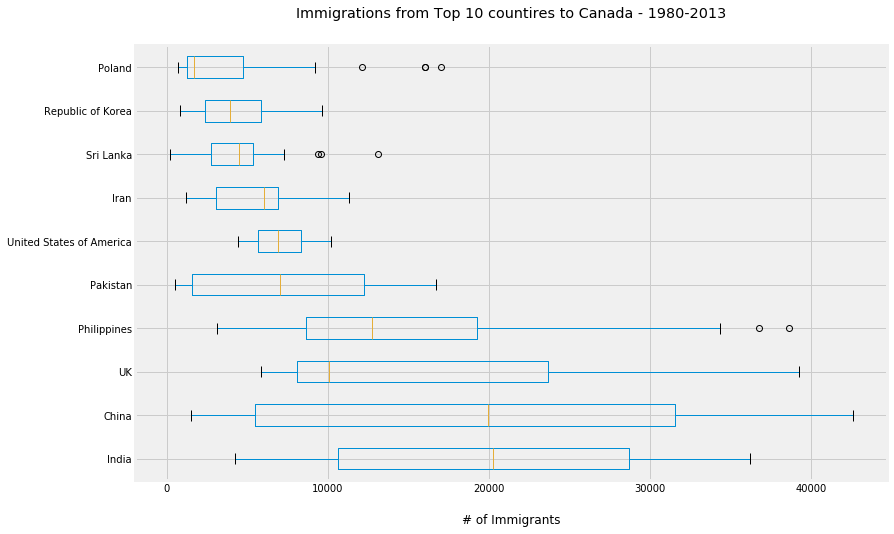

In [60]:
df.loc[top10, years].T.plot(kind='box', figsize=(12,8), vert=False)
plt.title('Immigrations from Top 10 countires to Canada - 1980-2013', y=1.05)
plt.xlabel('# of Immigrants', labelpad=20);

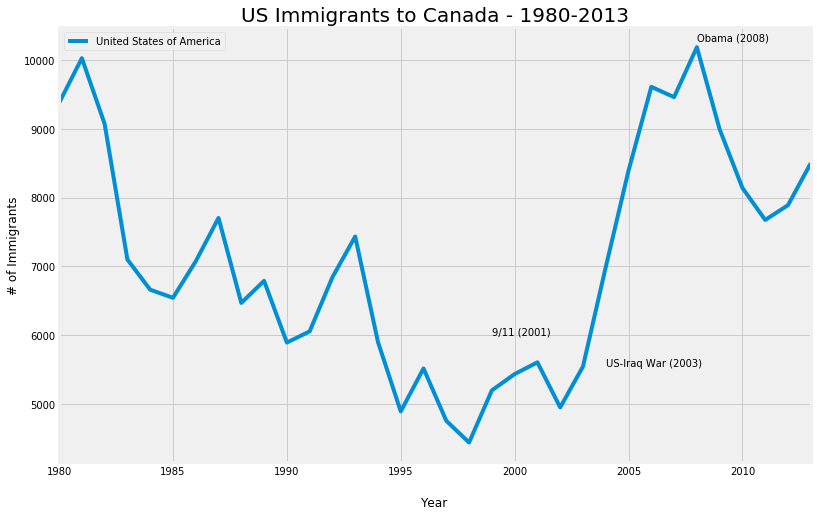

In [61]:
# Let's see what was the trend over the years for U.S.
df.loc[['United States of America'], years].T.plot(kind='line', figsize=(12, 8))
plt.title('US Immigrants to Canada - 1980-2013', size=20)
plt.text(1999, 6000, '9/11 (2001) ')
plt.text(2004, 5543, 'US-Iraq War (2003)')
plt.text(2008, 10290, 'Obama (2008)')
plt.ylabel('# of Immigrants')
plt.xlabel('Year', labelpad=20);
#Why is there a surge after 2001? 9/11?
# Conspiracy theories (╯°□°）╯︵ ┻━┻)

# Scatter Plots

In [62]:
# scatterplot doesn't work on series, so we have to create a dataframe of our aggregated series
total_year = pd.DataFrame(df[years].sum(axis=0))
total_year.reset_index(inplace=True)
#scatter plot also requires a x and y value so we have to move back the year index by resetting it and changing the names for ease of use
total_year.rename(columns={'index':'year', 0:'total'}, inplace=True)


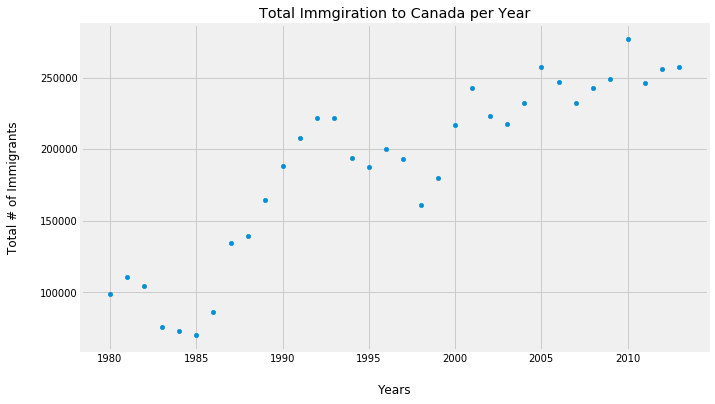

In [63]:
total_year.plot(kind='scatter', x='year', y='total', figsize=(10,6))
plt.title('Total Immgiration to Canada per Year')
plt.xlabel('Years', labelpad=20)
plt.ylabel('Total # of Immigrants', labelpad=20);

## Adding a Trendline

In [64]:
x = total_year['year']      # year on x-axis
y = total_year['total']     # total on y-axis
fit = np.polyfit(x, y, deg=1)

fit

array([ 5.56709228e+03, -1.09261952e+07])

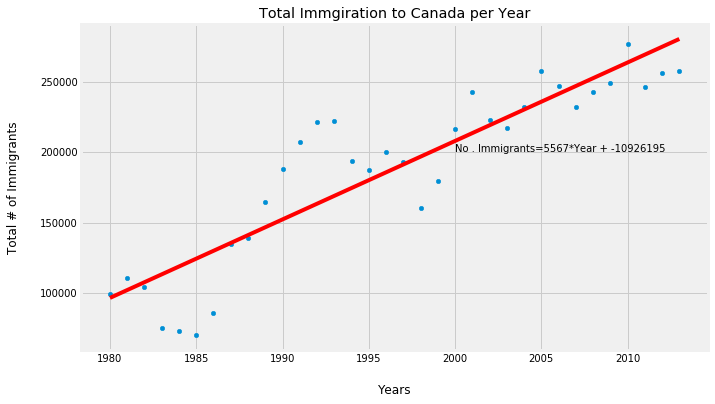

In [65]:
total_year.plot(kind='scatter', x='year', y='total', figsize=(10,6))
plt.title('Total Immgiration to Canada per Year')
plt.xlabel('Years', labelpad=20)
plt.ylabel('Total # of Immigrants', labelpad=20)

plt.plot(x, fit[0]*x + fit[1], color='r')
plt.annotate('No . Immigrants={0:.0f}*Year + {1:.0f}'.format(fit[0], fit[1]), xy=(2000, 200000))

plt.show()

# Area Plots

In [66]:
df_top5 = df.sort_values(['Total'], ascending=False, axis=0).head()[years].T

In [67]:
df_top5

,India,China,UK,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668
1985,4211,1816,9564,3150,514
1986,7150,1960,9470,4166,691
1987,10189,2643,21337,7360,1072
1988,11522,2758,27359,8639,1334
1989,10343,4323,23795,11865,2261


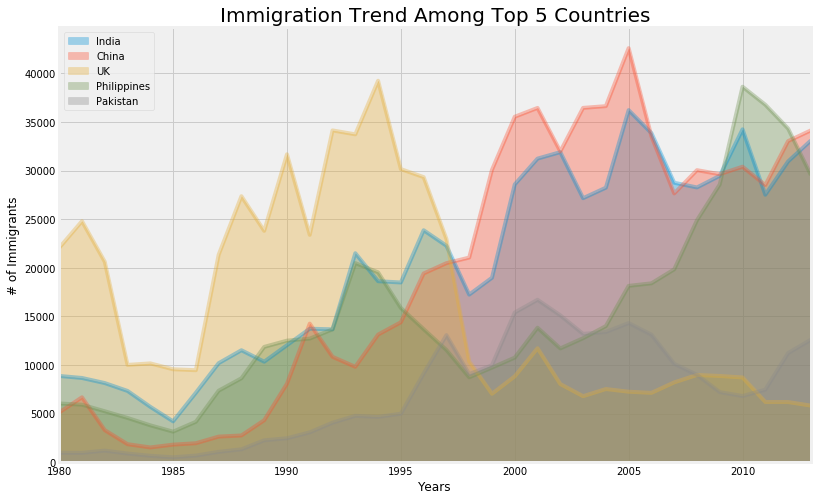

In [68]:
df_top5.plot(kind='area', alpha=0.35, stacked=False,  figsize=(12, 8));#default is stacked!#default alpha = 0.5
plt.title('Immigration Trend Among Top 5 Countries', size=20)
plt.legend()
plt.ylabel('# of Immigrants')
plt.xlabel('Years');

# Histograms

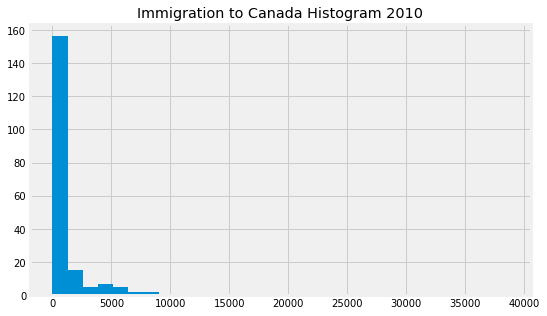

In [69]:
#method 1
df[2010].hist(bins=30, figsize=(8,5));#default bin is 10
plt.title('Immigration to Canada Histogram 2010');

[178  11   1   2   0   0   0   0   1   2]
[    0.   3412.9  6825.8 10238.7 13651.6 17064.5 20477.4 23890.3 27303.2
 30716.1 34129. ]


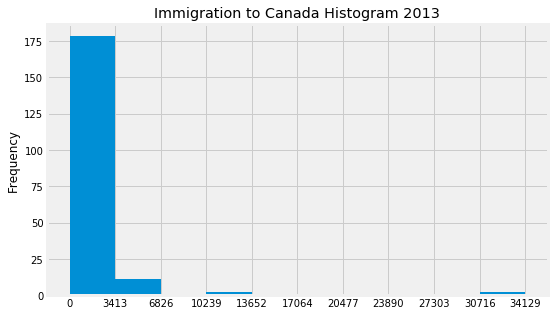

In [70]:
#method 2
count, bin_edges = np.histogram(df[2013])

print(count) # frequency count
print(bin_edges) # bin ranges, default = 10 bins
df[2013].plot(kind='hist', xticks=bin_edges, figsize=(8,5))
plt.title('Immigration to Canada Histogram 2013');

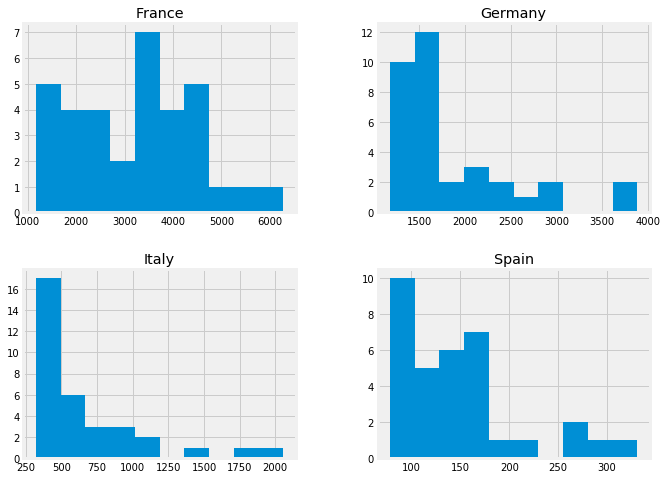

In [71]:
df.loc[['Spain', 'Italy', 'Germany', 'France'], years].T.hist(figsize=(10,8));
#if we use plt.title('title), title replaces last title which in this case is Spain

Text(0.5, 1.0, 'Immigration Histogram for European Countries to Canada - 1980-2013')

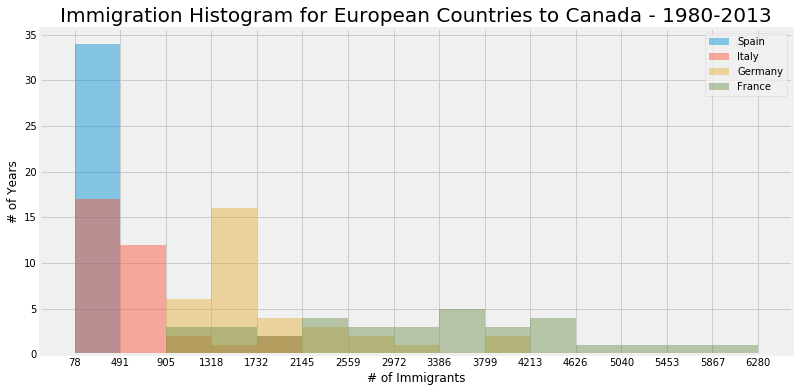

In [72]:
count, edges = np.histogram(df.loc[['Spain', 'Italy', 'Germany', 'France'], years].T, 15)
df.loc[['Spain', 'Italy', 'Germany', 'France'], years].T.plot(kind='hist', stacked=False, alpha=0.45, bins=15, xticks=edges, figsize=(12,6))
plt.xlabel('# of Immigrants')
plt.ylabel('# of Years')
plt.title('Immigration Histogram for European Countries to Canada - 1980-2013', size=20)